<a href="https://colab.research.google.com/github/Karim-Anwar/MasterThesis/blob/main/Padding_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
ERROR: Operation cancelled by user


In [3]:
import torch
from PIL import Image, ImageOps
from torchvision import transforms
# import timm

In [27]:
def resize_and_pad(image, desired_size):
    old_size = image.size
    ratio = float(desired_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])
    image = image.resize(new_size, Image.ANTIALIAS)
    print(image.size)
    new_image = Image.new("RGB", (desired_size, desired_size))
    new_image.paste(image, ((desired_size - new_size[0]) // 2, (desired_size - new_size[1]) // 2))
    return new_image


In [28]:
def resize_to_square(image, desired_size):
    old_size = image.size  # Get the current size of the image
    ratio = float(desired_size) / min(old_size)  # Determine the scaling ratio
    new_size = tuple([int(x * ratio) for x in old_size])  # Calculate the new size
    image = image.resize(new_size, Image.ANTIALIAS)  # Resize the image

    # Calculate coordinates to crop the central square
    left = (new_size[0] - desired_size) / 2
    top = (new_size[1] - desired_size) / 2
    right = (new_size[0] + desired_size) / 2
    bottom = (new_size[1] + desired_size) / 2

    # Crop the central square
    image = image.crop((left, top, right, bottom))
    return image

In [32]:
def reshape_to_square(image, desired_size):
    # Directly resize the image to the desired square dimensions
    new_image = image.resize((desired_size, desired_size), Image.ANTIALIAS)
    return new_image

In [36]:
# Load and process image
image = Image.open('/content/drive/MyDrive/sanity/val/217_1_1.jpg')
processed_image = reshape_to_square(image, 400)

<ipython-input-32-7cc7200cd494>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_image = image.resize((desired_size, desired_size), Image.ANTIALIAS)


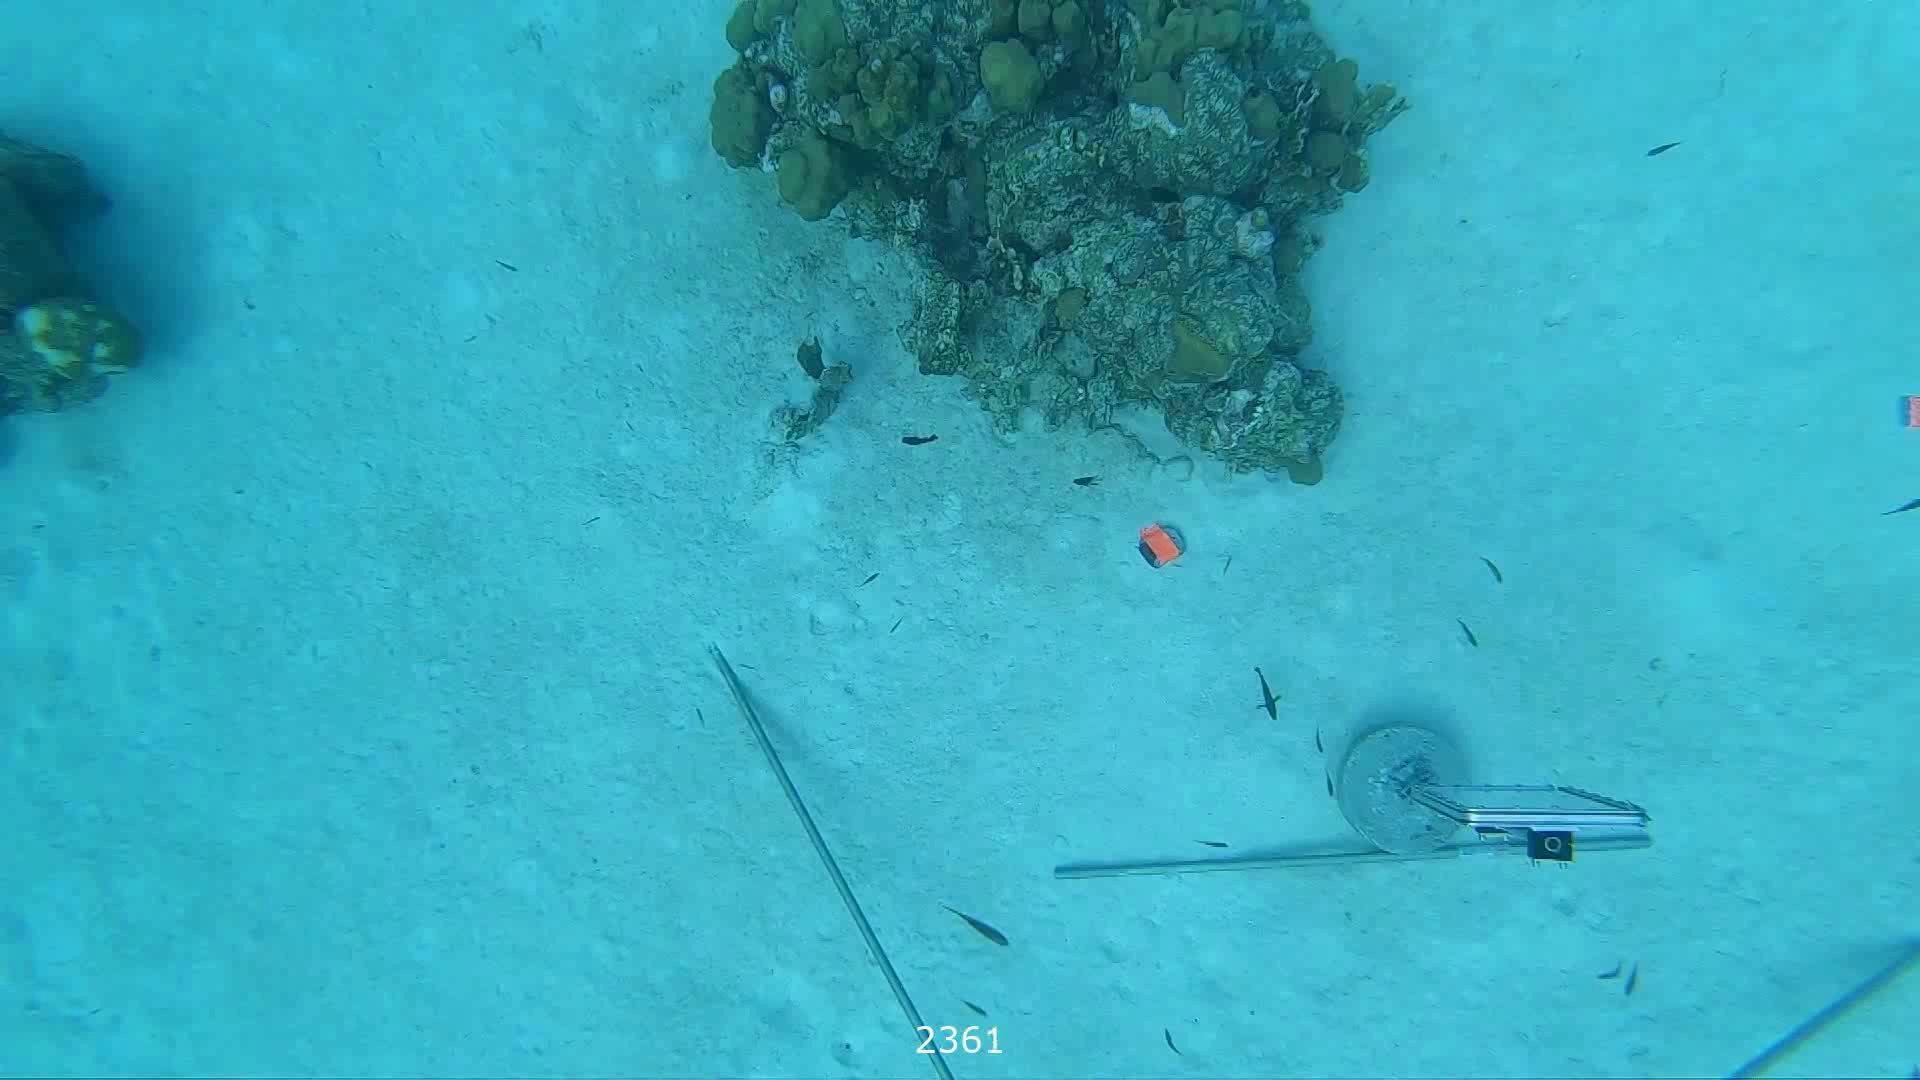

In [37]:
image

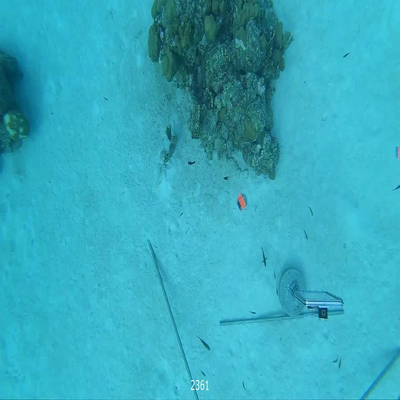

In [38]:
processed_image